In [36]:
import os
# change directory in order to be able to import python scripts from the common package
if os.getcwd().endswith('coinrun'): os.chdir(os.path.expanduser(".."))

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid
import torch.nn as nn
import augmentations
from env import CoinRunReplayBuffer

In [38]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

buffer = CoinRunReplayBuffer(device, 0, './coinrun/expert-dataset/hard')

In [49]:
frames, action = buffer.sample(17)

# Augmentations

In [39]:
print(frames.shape)
print(frames.dtype)
print(frames.min(), frames.max())

torch.Size([17, 3, 64, 64])
torch.float32
tensor(0.) tensor(1.)


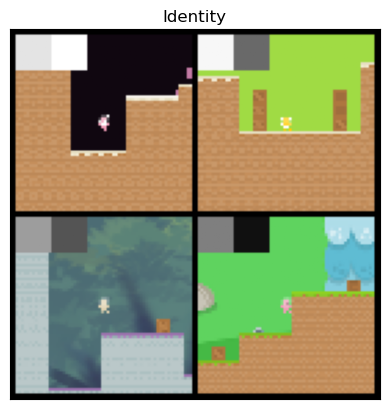

In [50]:
def show_imgs(x, max_display=16, title:str = ""):
    n_cols = 2 if max_display == 4 else 4
    grid = make_grid(x[:max_display],n_cols).permute(1,2,0).cpu().numpy()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(grid)
    if len(title) > 0: plt.title(title)
    plt.show()

show_imgs(frames, title="Identity", max_display=4)

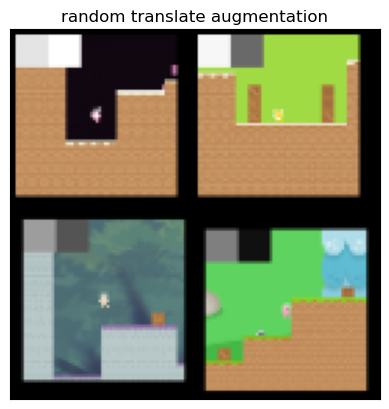

In [51]:
aug_frames = augmentations.random_translate(frames,70)
show_imgs(aug_frames, title="random translate augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

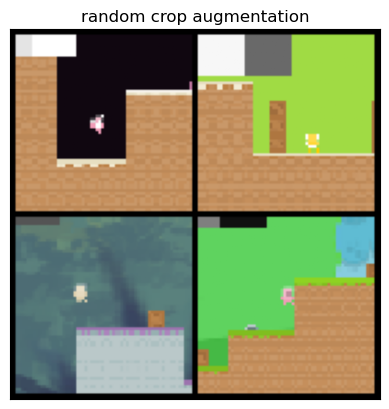

In [52]:
aug_frames = augmentations.random_crop(frames,50)
show_imgs(aug_frames, title="random crop augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

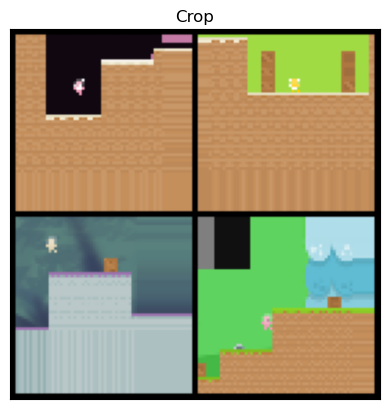

In [53]:
aug_frames = augmentations.random_crop2(frames, padding=30)
show_imgs(aug_frames, title="Crop", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

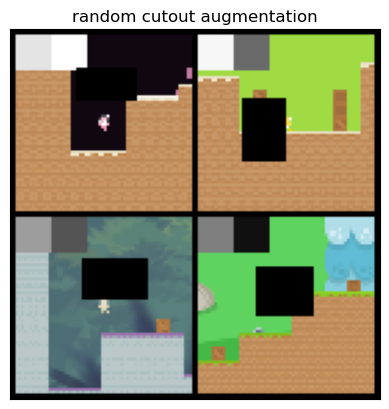

In [54]:
aug_frames = augmentations.random_cutout(frames,10,25)
show_imgs(aug_frames, title="random cutout augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

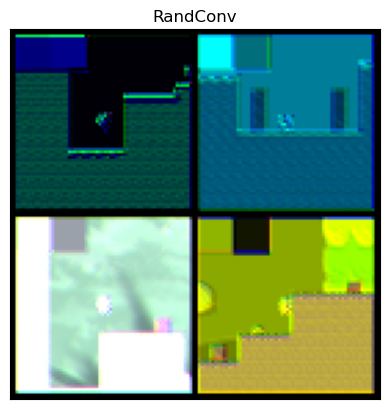

: 

In [65]:
aug_frames = augmentations.rand_conv(frames)
show_imgs(aug_frames, title="RandConv", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

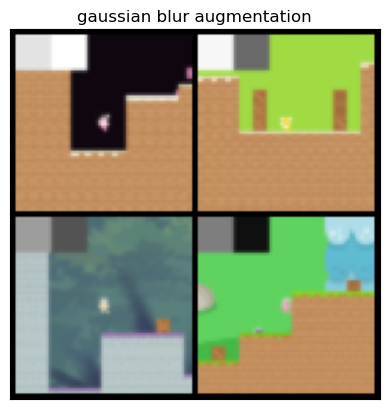

In [56]:
aug_frames = augmentations.gaussian_blur(frames, kernel_size=3, sigma=0.6)
show_imgs(aug_frames, title="gaussian blur augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

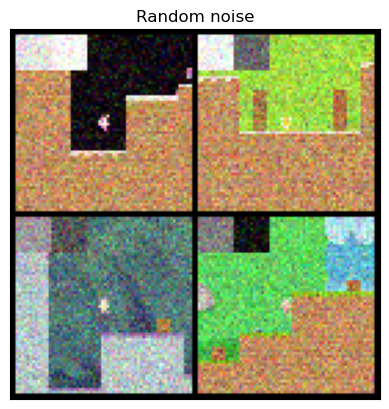

In [57]:
aug_frames = augmentations.random_noise(frames, strength=0.1)
show_imgs(aug_frames, title="Random noise", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

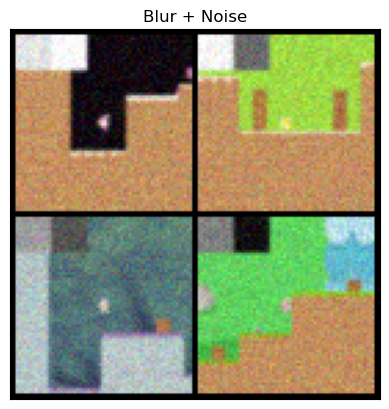

In [58]:
aug_frames = augmentations.blur_and_noise(frames)
show_imgs(aug_frames, title="Blur + Noise", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"